### Activity 1
### 63010026 กฤตศยา นทีมณฑล
### 63010339 ณัฐวดี ติณภูมิ

In [1431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

Import Data

In [1432]:
df = pd.read_csv("Data_example.csv",encoding = "ISO-8859-1")

Data Exploration

In [1433]:
print(df)
print(df.shape)

       X     Y        Z
0     19  1927      cat
1    NaN  2300      dog
2     15   NaN     bird
3     16  5959      cat
4     16    AB      cat
5    NaN  4594      dog
6     19  1927      cat
7     20  2879  birdËÁÒ
8     21   NaN      NaN
9      0  4096      cat
10     A  6730      cat
11    25     0     bird
12     0  2792      dog
13    33  2575    dog¹¡
14  1000  4959     bird
15    19  1927      cat
16    36  4580      dog
17    40  5869      NaN
18   NaN  4178      dog
19    45   NaN      cat
(20, 3)


In [1434]:
df

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,birdËÁÒ
8,21,NaN,NaN
9,0,4096,cat


In [1435]:
df.shape

(20, 3)

Data Cleaning

In [1439]:
df['Z'].replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)

In [1440]:
df

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,bird
8,21,NaN,NaN
9,0,4096,cat


In [1441]:
df.drop_duplicates()

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
7,20,2879,bird
8,21,NaN,NaN
9,0,4096,cat
10,A,6730,cat


In [1442]:
df.dtypes

X    object
Y    object
Z    object
dtype: object

In [1443]:
df=df.astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     string
 1   Y       17 non-null     string
 2   Z       18 non-null     string
dtypes: string(3)
memory usage: 608.0 bytes


In [1444]:
df['X'] = pd.to_numeric(df['X'], errors = 'coerce')
df['Y'] = pd.to_numeric(df['Y'], errors = 'coerce')


df['X'] = df['X'].astype('Int64')
df['Y'] = df['Y'].astype('Float64')
df.describe()

,X,Y
count,16.00000,16.000000
mean,82.75000,3580.750000
std,244.91291,1828.473808
min,0.00000,0.000000
25%,16.00000,2206.750000
50%,19.50000,3487.500000
75%,33.75000,4685.250000
max,1000.00000,6730.000000


In [1445]:
df.dropna(thresh=2,inplace=True) #case NAN > 1

In [1446]:
df.dtypes

X      Int64
Y    Float64
Z     string
dtype: object

In [1447]:
df['X'].fillna(df['X'].median().round(),inplace=True)
df['Y'].fillna(df['Y'].median(),inplace=True)
df['Z'].ffill(inplace=True)
df


,X,Y,Z
0,19,1927.0,cat
1,19,2300.0,dog
2,15,3487.5,bird
3,16,5959.0,cat
4,16,3487.5,cat
5,19,4594.0,dog
6,19,1927.0,cat
7,20,2879.0,bird
9,0,4096.0,cat
10,19,6730.0,cat


Data Transformation

In [1448]:
#Data Transformation
df_clean = df.copy()
df_std=preprocessing.MinMaxScaler()
df_clean[['X','Y']]=df_std.fit(df_clean[['X','Y']]).transform(df_clean[['X', 'Y']])
df_clean

,X,Y,Z
0,0.019,0.286330,cat
1,0.019,0.341753,dog
2,0.015,0.518202,bird
3,0.016,0.885438,cat
4,0.016,0.518202,cat
5,0.019,0.682615,dog
6,0.019,0.286330,cat
7,0.020,0.427786,bird
9,0.000,0.608618,cat
10,0.019,1.000000,cat


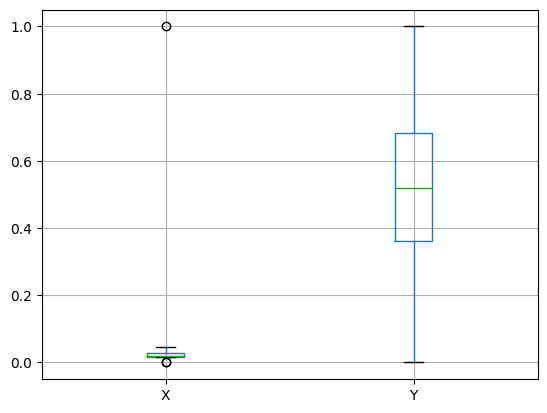

In [1449]:
#!minmaxscaler boxplot
boxplot=df_clean.boxplot(column=['X','Y'])
plt.show()

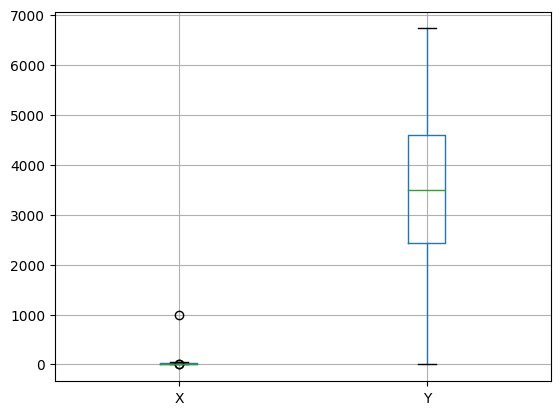

In [1450]:
#!outlier boxplot หลัง Data Cleaning แทน NaN Column X,Y ด้วย Median)
boxplot=df.boxplot(column=['X','Y'])
plt.show()

In [1451]:
Q1_x=df_clean['X'].quantile(0.25)
Q3_x=df_clean['X'].quantile(0.75)
IQR_X = Q3_x-Q1_x
Q1_y=df_clean['Y'].quantile(0.25)
Q3_y=df_clean['Y'].quantile(0.75)
IQR_Y = Q3_y-Q1_y
print(IQR_X,IQR_Y)

0.0115 0.3193907875185735


In [1452]:
outlier_x1 = Q1_x-(1.5*IQR_X)
outlier_x2 = Q3_x+(1.5*IQR_X)
outlier_y1 = Q1_y-(1.5*IQR_Y)
outlier_y2 = Q3_y+(1.5*IQR_Y)
print(outlier_x1,outlier_x2,outlier_y1,outlier_y2)

0.0002500000000000002 0.04625 -0.11690193164933138 1.1606612184249627


In [1453]:
df_clean2=df_clean[(df_clean['X']>=outlier_x1) & (df_clean['X']<=outlier_x2) & (df_clean['Y']>=outlier_y1) & (df_clean['Y']<=outlier_y2)]

In [1454]:
df_clean2

,X,Y,Z
0,0.019,0.286330,cat
1,0.019,0.341753,dog
2,0.015,0.518202,bird
3,0.016,0.885438,cat
4,0.016,0.518202,cat
5,0.019,0.682615,dog
6,0.019,0.286330,cat
7,0.020,0.427786,bird
10,0.019,1.000000,cat
11,0.025,0.000000,bird


In [1455]:
df_clean3 = df_clean2.copy()
df_std=preprocessing.MinMaxScaler()
df_clean3[['X','Y']]=df_std.fit(df_clean3[['X','Y']]).transform(df_clean3[['X', 'Y']])
df_clean3

,X,Y,Z
0,0.133333,0.286330,cat
1,0.133333,0.341753,dog
2,0.000000,0.518202,bird
3,0.033333,0.885438,cat
4,0.033333,0.518202,cat
5,0.133333,0.682615,dog
6,0.133333,0.286330,cat
7,0.166667,0.427786,bird
10,0.133333,1.000000,cat
11,0.333333,0.000000,bird


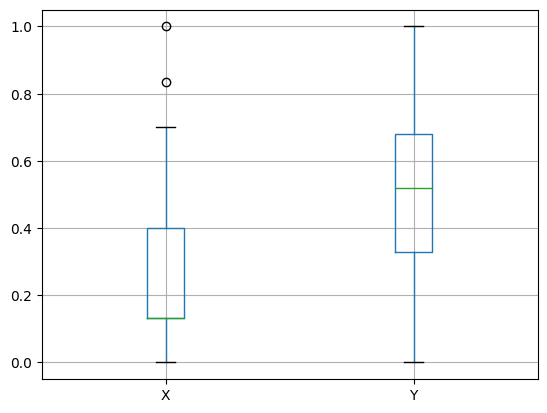

In [1456]:
#!remove outlier boxplot
boxplot=df_clean3.boxplot(column=['X','Y'])
plt.show()

Data Category

In [1457]:
df_category=df_clean3.reset_index()
df_category

,index,X,Y,Z
0,0,0.133333,0.286330,cat
1,1,0.133333,0.341753,dog
2,2,0.000000,0.518202,bird
3,3,0.033333,0.885438,cat
4,4,0.033333,0.518202,cat
5,5,0.133333,0.682615,dog
6,6,0.133333,0.286330,cat
7,7,0.166667,0.427786,bird
8,10,0.133333,1.000000,cat
9,11,0.333333,0.000000,bird


In [1458]:
#LabelEncoder
df_labelEncoder=preprocessing.LabelEncoder()
df_category['Z_Category']=df_labelEncoder.fit(df_category['Z']).transform(df_category['Z'])
df_category

,index,X,Y,Z,Z_Category
0,0,0.133333,0.286330,cat,1
1,1,0.133333,0.341753,dog,2
2,2,0.000000,0.518202,bird,0
3,3,0.033333,0.885438,cat,1
4,4,0.033333,0.518202,cat,1
5,5,0.133333,0.682615,dog,2
6,6,0.133333,0.286330,cat,1
7,7,0.166667,0.427786,bird,0
8,10,0.133333,1.000000,cat,1
9,11,0.333333,0.000000,bird,0


In [1459]:
print(df_category)

    index         X         Y     Z  Z_Category
0       0  0.133333  0.286330   cat           1
1       1  0.133333  0.341753   dog           2
2       2  0.000000  0.518202  bird           0
3       3  0.033333  0.885438   cat           1
4       4  0.033333  0.518202   cat           1
5       5  0.133333  0.682615   dog           2
6       6  0.133333  0.286330   cat           1
7       7  0.166667  0.427786  bird           0
8      10  0.133333  1.000000   cat           1
9      11  0.333333  0.000000  bird           0
10     13  0.600000  0.382615   dog           2
11     15  0.133333  0.286330   cat           1
12     16  0.700000  0.680535   dog           2
13     17  0.833333  0.872065   dog           2
14     18  0.133333  0.620802   dog           2
15     19  1.000000  0.518202   cat           1


In [1460]:
y=pd.get_dummies(df_category.Z,dtype=float)

In [1461]:
pd.concat([df_category,y],axis=1).drop('index',axis=1)

,X,Y,Z,Z_Category,bird,cat,dog
0,0.133333,0.286330,cat,1,0.0,1.0,0.0
1,0.133333,0.341753,dog,2,0.0,0.0,1.0
2,0.000000,0.518202,bird,0,1.0,0.0,0.0
3,0.033333,0.885438,cat,1,0.0,1.0,0.0
4,0.033333,0.518202,cat,1,0.0,1.0,0.0
5,0.133333,0.682615,dog,2,0.0,0.0,1.0
6,0.133333,0.286330,cat,1,0.0,1.0,0.0
7,0.166667,0.427786,bird,0,1.0,0.0,0.0
8,0.133333,1.000000,cat,1,0.0,1.0,0.0
9,0.333333,0.000000,bird,0,1.0,0.0,0.0
